# Assessment 2019

## Machine Learning and Statistics

### Student: G00364696




### Contents and Assignment Objectives

- [Describe](#Describe)
Use descriptive statistics and plots to describe the Boston House Prices dataset


- [Infer](#Infer)
Use inferential statistics to analyse whether there is a significant difference in median house prices between houses that are along the Charles river and those that are not.


- [Predict](#Predict)
Use keras to create a neural network that can predict the median house price based on the other variables in the dataset

(Click on link in section title to go to section)

In [16]:
# import Libraries required for this project

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import keras as kr

plt.rcParams['figure.figsize'] = [20,20]

<a id="Describe"></a>

## Describe

### Origin of the dataset:
Each record in the dataset describes a boston suburb or town. The data in the Boston House Price dataser was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) from 1970 and collated in 1978. Each record in the dataset describes a boston suburb or town. There are 506 records in the dataset, with 14 variables representing information that may be related to that town.



These variables are:

- CRIM	
    Per capita crime rate by town
- ZN	
    Proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS	
    Proportion of non-retail business acres per town
- CHAS	
    Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX	
    Nitric oxides concentration (parts per 10 million)
- RM	
    Average number of rooms per dwelling
- AGE	
    Proportion of owner-occupied units built prior to 1940
- DIS
    Weighted distances to five Boston employment centres
- RAD	
    Index of accessibility to radial highways
- TAX	
    Full-value property-tax rate per 10,000 USD
- PTRATIO	
    Pupil-teacher ratio by town
- B	1000
    (Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT
    % lower status of the population
- MEDV	
    Median value of owner-occupied homes in $1000's

**This will need to be referenced**

Note that the name of the district is not among the variables.

The "target" variable is MEDV, the median value of owner occupied homes (in $1,000s). A number of previous analyses seem to suggest that 16 data points under MEDV may conatin missing or censored values, and it may be worth considering if these should be removed. 

For this project, a copy of the dataset has been downloaded from the open machine learning website (www.openml.org), although other sources were available. For example, in an earlier version of this project, the data was accessed as a module imported from the sklearn package

A dataframe will be created from this scsv file using the pandas read_csv method. Then summary statistics will be generated using the pandas describe function.



possible adaptations?
A similar dataset could be devised for Irish house prices, taking addresses from the property price register and adding variables relating to the area in which the property is located, e.g. deprivation index (Pobal), number of schools, proximity to public transport and other amenities, educational attainment/occupational status of population etc.

In [17]:
# loading the boston house price dataset and converting to pandas dataframe

boston = pd.read_csv('boston.csv')
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [18]:
# Generating summary statistics using the pandas describe method.
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Analysing the variance in median house prices by town/suburb

Our main interest is the house price (MEDV). Therefore, the first step we should do is to eyeball the values in this field. The snippets of python code in the values in the MEDV field ascending order. To visualise the variance in house prices, a boxplot and then a histogram will be created

In [19]:
# code to create a sorted list of house price values:
l = list(boston['MEDV'])
l.sort()
print(l)
print(sp.stats.mode(l)) # using scipy.stats mode funciton to find the most common value - relevant to analysis below.


[5.0, 5.0, 5.6, 6.3, 7.0, 7.0, 7.2, 7.2, 7.2, 7.4, 7.5, 8.1, 8.3, 8.3, 8.4, 8.4, 8.5, 8.5, 8.7, 8.8, 8.8, 9.5, 9.6, 9.7, 10.2, 10.2, 10.2, 10.4, 10.4, 10.5, 10.5, 10.8, 10.9, 10.9, 11.0, 11.3, 11.5, 11.7, 11.7, 11.8, 11.8, 11.9, 11.9, 12.0, 12.1, 12.3, 12.5, 12.6, 12.7, 12.7, 12.7, 12.8, 13.0, 13.1, 13.1, 13.1, 13.1, 13.2, 13.3, 13.3, 13.3, 13.4, 13.4, 13.4, 13.4, 13.5, 13.5, 13.6, 13.6, 13.8, 13.8, 13.8, 13.8, 13.8, 13.9, 13.9, 14.0, 14.1, 14.1, 14.1, 14.2, 14.3, 14.3, 14.4, 14.4, 14.5, 14.5, 14.5, 14.6, 14.6, 14.8, 14.9, 14.9, 14.9, 15.0, 15.0, 15.0, 15.1, 15.2, 15.2, 15.2, 15.3, 15.4, 15.4, 15.6, 15.6, 15.6, 15.6, 15.6, 15.7, 16.0, 16.1, 16.1, 16.1, 16.2, 16.2, 16.3, 16.4, 16.5, 16.5, 16.6, 16.6, 16.7, 16.7, 16.8, 16.8, 17.0, 17.1, 17.1, 17.1, 17.2, 17.2, 17.2, 17.3, 17.4, 17.4, 17.4, 17.5, 17.5, 17.5, 17.6, 17.7, 17.8, 17.8, 17.8, 17.8, 17.8, 17.9, 18.0, 18.1, 18.2, 18.2, 18.2, 18.3, 18.3, 18.4, 18.4, 18.4, 18.5, 18.5, 18.5, 18.5, 18.6, 18.6, 18.7, 18.7, 18.7, 18.8, 18.8, 18.9, 18.

Now, we will visualise the variance in the data by way of a boxplot and a histogram.

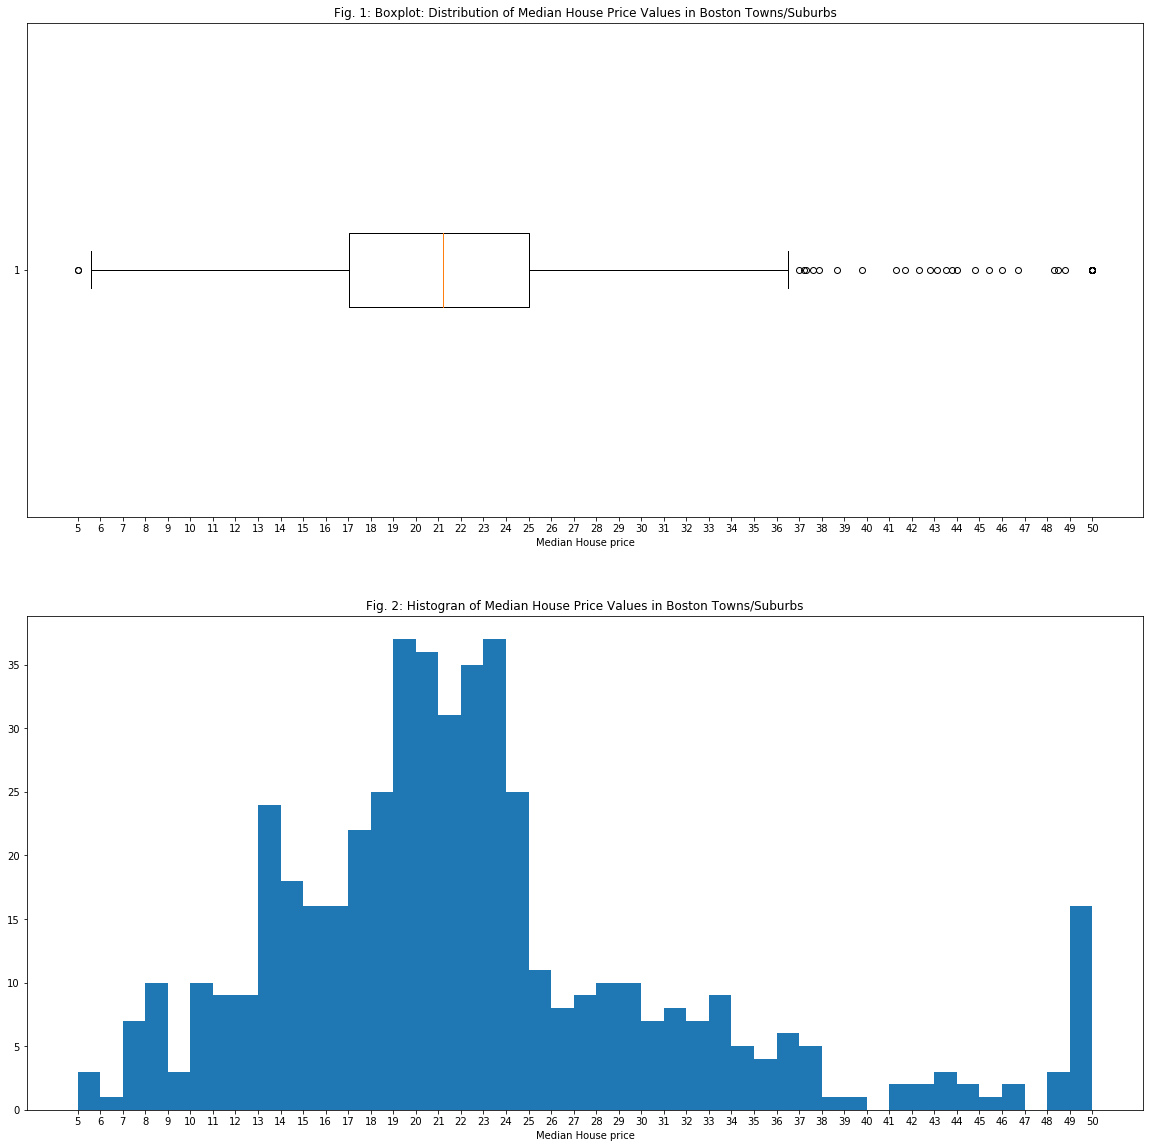

In [20]:
# create a numpy array from the MEDV (median value) column in the boston dataset
price = np.array(boston['MEDV'])

# Create a boxplot using pyplot
plt.subplot(2,1,1)
plt.boxplot(price, vert = False)

plt.title("Fig. 1: Boxplot: Distribution of Median House Price Values in Boston Towns/Suburbs")
plt.xlabel("Median House price")
plt.xticks(np.arange(min(price), max(price)+1, 1.0)) # x label ticks spaced at $ 5,000 intervals 

plt.subplot(2,1,2)
plt.hist(price, bins =np.arange(min(price), max(price)+1, 1.0) )
plt.title("Fig. 2: Histogran of Median House Price Values in Boston Towns/Suburbs")
plt.xlabel("Median House price")
plt.xticks(np.arange(min(price), max(price)+1, 1.0)) # 

plt.show()

### Initial observations. 

As can be seen from the above plots (and the descriptive statistics generated above), the mean price is roughly \\$23K. The boxplot shows a dataset that is centred around this mean with most of values lying between \\$ 17 and about  \\$ 25  (the 25% and 75% percentile points). The histogram shows a dataset which could almost conform to a normal distribution, were it not for the outliers above the \\$ 25K point.

The most common value in the data set is 50, a value that occurs in 16 rows. A number of analysts who have worked on this datset have suggested that that these data points represent missing or censored data values. They do appear as outliers and this approach may have merit.

### Rationale for excluding 16 rows of 50s:

following precedent of more experienced researchers

if some of this cluster is over represented in either of the samples in section 2 (either in chas = true or chas = 1) it might skew the result.

Likewise, in section 3, we will divide the dataset into training and testing datasets (80/20 ratio). Again, if these values are overrepresented in the training sample they might lead to inaccurate predictions. we could do a seperate set of predictions when on the 16 once we have fine tuned the network


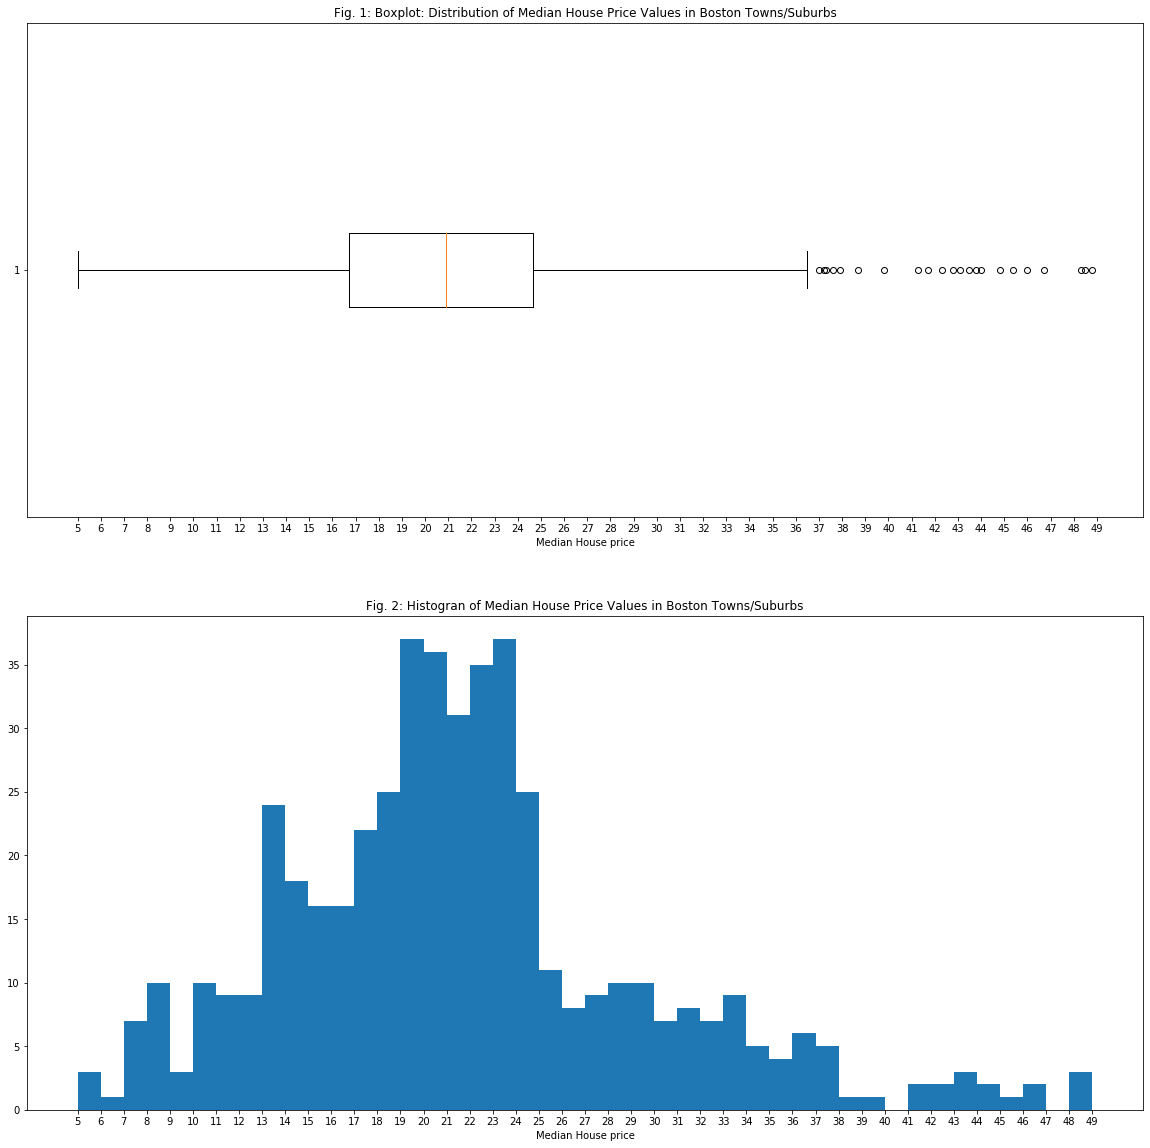

In [21]:
# code to remove the 16 rows where MEDV == 50

# l = list(boston[boston['MEDV']!=50])
# l.sort()
# print(l)
# print(sp.stats.mode(l)) # using scipy.stats mode funciton to find the most common value - relevant to analysis below.

boston = boston[boston['MEDV'] != 50.0]
price = boston['MEDV']

price = np.array(boston['MEDV'])

# Create a boxplot using pyplot
plt.subplot(2,1,1)
plt.boxplot(price, vert = False)

plt.title("Fig. 1: Boxplot: Distribution of Median House Price Values in Boston Towns/Suburbs")
plt.xlabel("Median House price")
plt.xticks(np.arange(min(price), max(price)+1, 1.0)) # x label ticks spaced at $ 5,000 intervals 

plt.subplot(2,1,2)
plt.hist(price, bins =np.arange(min(price), max(price)+1, 1.0) )
plt.title("Fig. 2: Histogran of Median House Price Values in Boston Towns/Suburbs")
plt.xlabel("Median House price")
plt.xticks(np.arange(min(price), max(price)+1, 1.0)) # 

plt.show()

**Next steps: Exploring relationships and ommitting irrelevant variables**

Victor Roman:
"The essential features for the project are: ‘RM’ (number of rooms), ‘LSTAT’ (lower status of the population), ‘PTRATIO’ (Pupil-teacher ratio) and ‘MEDV’. The remaining features have been excluded".
https://towardsdatascience.com/machine-learning-project-predicting-boston-house-prices-with-regression-b4e47493633d
see also http://kitmarks.com/boston_housing.html
Why?

see also ... https://www.researchgate.net/publication/245315755_Visualizable_and_interpretable_regression_models_with_good_prediction_power

mmm ... would it not be the case that (inversely) MEDV would have an inverse relationship with LSTAT?
but do remember ... predictor in this sense is not about causal reationships.



Terminology: Target Variable (MEDV) vs 'feature' variables.

Q - should we do a correlation matrix? e.g. like https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155
code would be  ... 
correlation_matrix = boston.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True) # annot = True to print the values inside the square

what might we learn from this?


In [ ]:
# Looking at relationships between variables and MEDV

# select variables - do we for all? we could run a loop to do all?

# Plot as points

# create line(s) of best fit.

In [22]:
# create a list of column names from Boston
cols = list(boston.columns)
cols.pop()

print(cols)

plt.rcParams['figure.figsize'] = [10,10]

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


### Exploring the relationship between pupil-teacher ratio, social status, race and criminality and median house price.

In this next subsections, we will create scatterplots with lines of best fit to see if we can identify relationships between selected 'feature' variables and the Median House Price for each town.


We will begin by looking at demographics. We have two demographic variables, namely Lower Status and B, related to the number of african americans in an area. We also have two related variables, the extent of criminality and the pupil-teacher ratio (which may be inversely related to educational attainment).

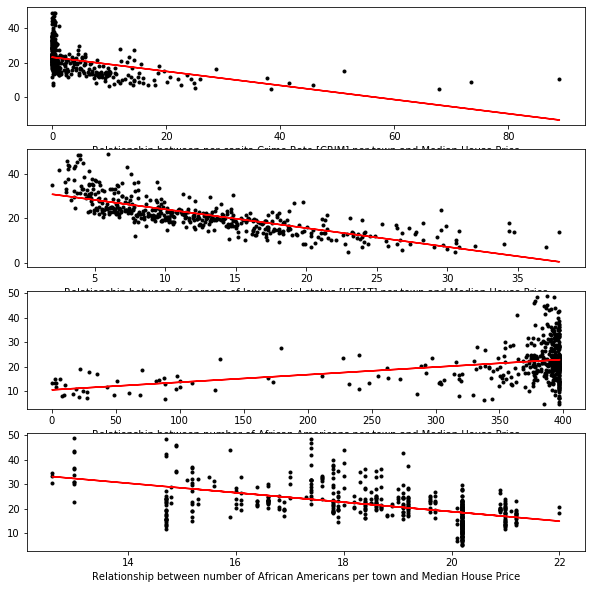

In [26]:

# use numply polyfit to get parameters of the equation of the line of best fit
# m = np.polyfit(x,y,1)[0]
# c = np.polyfit(x,y,1)[1]

plt.subplot(4,1,1)
# Plot relationship between criminality and house price
x = boston['CRIM']
y = boston['MEDV']
m = np.polyfit(x,y,1)[0]
c = np.polyfit(x,y,1)[1]
plt.plot(x,y,'k.')
plt.plot(x,m*x+c,'r')
plt.xlabel("Relationship between per-capita Crime Rate [CRIM] per town and Median House Price")
plt.subplot(4,1,2)
# Plot relationship between social status and house price
x = boston['LSTAT']
y = boston['MEDV']
m = np.polyfit(x,y,1)[0]
c = np.polyfit(x,y,1)[1]
plt.plot(x,y,'k.')
plt.plot(x,m*x+c,'r')
plt.xlabel("Relationship between % persons of lower social status [LSTAT] per town and Median House Price")
# Plot relationship between the number of african americans in an area and house price
plt.subplot(4,1,3)
x = boston['B']
y = boston['MEDV']
m = np.polyfit(x,y,1)[0]
c = np.polyfit(x,y,1)[1]
plt.plot(x,y,'k.')
plt.plot(x,m*x+c,'r')
plt.xlabel("Relationship between number of African Americans per town and Median House Price")
# Plot relationship between the pupil-teacher ratio in an area and house eprice
plt.subplot(4,1,4)
x = boston['PTRATIO']
y = boston['MEDV']
m = np.polyfit(x,y,1)[0]
c = np.polyfit(x,y,1)[1]
plt.plot(x,y,'k.')
plt.plot(x,m*x+c,'r')
plt.xlabel("Relationship between number of pupil teacher ratio per town and Median House Price")

plt.show()


## Comment:

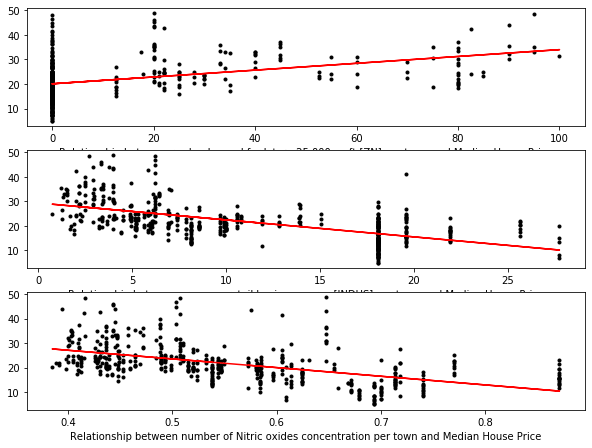

In [27]:
plt.subplot(4,1,1)
# Plot relationship between residential land zoned for lots > 25,000 sq.ft and house price
x = boston['ZN']
y = boston['MEDV']
m = np.polyfit(x,y,1)[0]
c = np.polyfit(x,y,1)[1]
plt.plot(x,y,'k.')
plt.plot(x,m*x+c,'r')
plt.xlabel("Relationship between res land zoned for lots > 25,000 sq.ft [ZN] per town and Median House Price")
plt.subplot(4,1,2)
# Plot relationship between prop non-retail business acres and house price
x = boston['INDUS']
y = boston['MEDV']
m = np.polyfit(x,y,1)[0]
c = np.polyfit(x,y,1)[1]
plt.plot(x,y,'k.')
plt.plot(x,m*x+c,'r')
plt.xlabel("Relationship between prop non-retail business acres [INDUS] per town and Median House Price")
# Plot relationship between the number of Nitric oxides concentration per town and house price
plt.subplot(4,1,3)
x = boston['NOX']
y = boston['MEDV']
m = np.polyfit(x,y,1)[0]
c = np.polyfit(x,y,1)[1]
plt.plot(x,y,'k.')
plt.plot(x,m*x+c,'r')
plt.xlabel("Relationship between number of Nitric oxides concentration per town and Median House Price")

plt.show()

### Comment

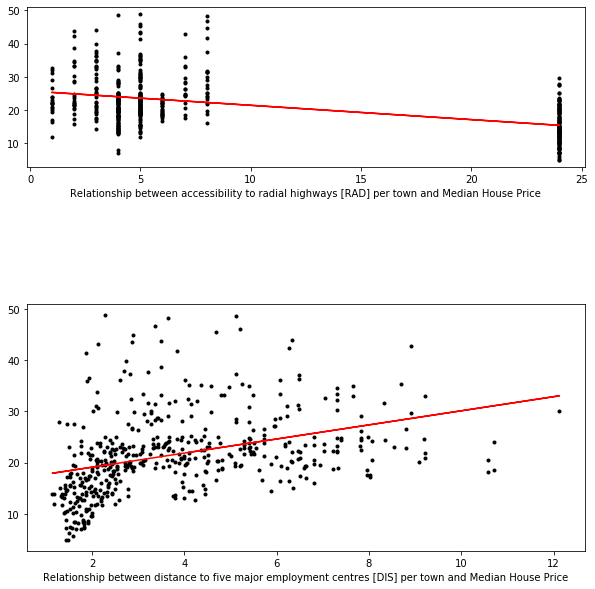

In [29]:
# Property characteristics

plt.subplot(3,1,1)
# Plot relationship between accessibility to radial highways and house price
x = boston['RAD']
y = boston['MEDV']
m = np.polyfit(x,y,1)[0]
c = np.polyfit(x,y,1)[1]
plt.plot(x,y,'k.')
plt.plot(x,m*x+c,'r')
plt.xlabel("Relationship between accessibility to radial highways [RAD] per town and Median House Price")
plt.subplot(2,1,2)
# Plot relationship between distance to five major employment centres and house price
x = boston['DIS']
y = boston['MEDV']
m = np.polyfit(x,y,1)[0]
c = np.polyfit(x,y,1)[1]
plt.plot(x,y,'k.')
plt.plot(x,m*x+c,'r')
plt.xlabel("Relationship between distance to five major employment centres [DIS] per town and Median House Price")
plt.show()

### Comment

<a id="Infer"></a>

# Infer

In this section we will perform a two sample t-test to see if there is a significant difference between the median house prices of houses along the Charles river and those that aren't.

Q - does it have to be a T-test? whay 

Discuss aims of t-test. Two samples. What constitutes significant difference in this context?

Explanation of findings and what we can learn from T-Tests





In [ ]:
# code to create two data sets

In [ ]:
# code to get samples - now, what is the minimum and/or maximum number of samples needed for a viable T-test? See notes
# and re-read wikipedia and e-books where covered.

<a id="Predict"></a>
## Predict

The aim of this section is to create a nueral network using the python package Keras that can predict the median house price based on the other variables in the dataset.

** The project spec states based on the other variables in the dataset **
Therefore ... would it be wise to even consider leaving out other variables at all?

The workings done following the lecture on the dogs database will be used as a template for this section.


Now, maybe there could be two "runs", one with all variables, one with selected variables ... what do we learn from this?

- What variables are we going to base the predication on?
- Do we need to create any new variables (e.g. to codify any categorical variables)?
- Decide on input variables
- Decide on output

Create the training set:
- What might be the reccommended ratio to use as a training/target set?


create the neural network
- instantiate a sequential model
- add layers
- compile model



Train the neural network
- m.fit
- run and make note of loss
- do predictions - based on training set
- evaluate predictions - compare predicted house prices with actual values (all or a sample?)

Do we need to do anything to improve the performace of the network?

Need to watch final lecture series (Tuning nueral network in order to decide further course of action on this section)


how will we sel

In [ ]:
# Create training and test sets




In [ ]:
# Create the neural network

# This was the first network we used in the dogs workings

# The Sequential model is a linear stack of layers.

# instantiate an instance of a sequential model
m = kr.models.Sequential()

# add layers
# dim = x, where x is the number of inputs

m.add(kr.layers.Dense(10, input_dim=5, activation = "linear")) # dim = 5 because there are five input variables. 
m.add(kr.layers.Dense(10, activation = "linear")) # still not sure why we add another 10 ...
m.add(kr.layers.Dense(1, activation="linear")) # for the output

# Once your model looks good, configure its learning process with .compile():
m.compile(loss= "mean_squared_error", optimizer = "adam")


In [ ]:
# now, run  the network. Look at the loss (maybe look into what this actually means)

# rerun until the loss is minimal and we have a high (aim for 100%) prediction rate on the test set.

In [ ]:
# running prediction command

m.predict(inputs) # 

In [ ]:
# evaluation of predicted vs actual (median) house price

# looking at the difference between the predicted lifespan (output) and the actual lifespan

m.predict(inputs).T - output.as_matrix() # transposing input set and matrix-ising output set so they can be subtracted